In [57]:
import re
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [58]:
pd.set_option('display.max_rows', None)

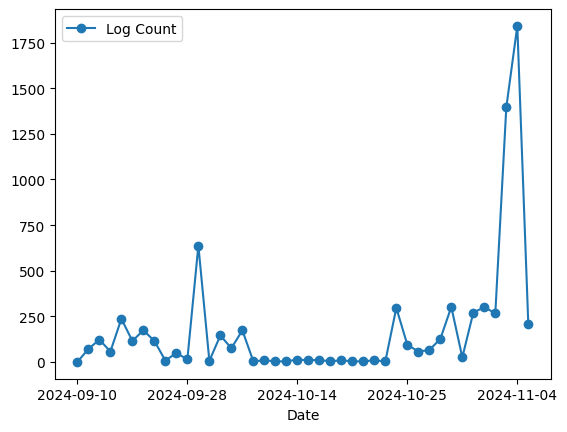

          Date  Log Count
0   2024-09-10          1
1   2024-09-11         72
2   2024-09-12        123
3   2024-09-14         58
4   2024-09-15        237
5   2024-09-16        116
6   2024-09-17        174
7   2024-09-20        116
8   2024-09-23          8
9   2024-09-26         50
10  2024-09-28         15
11  2024-10-05        638
12  2024-10-06          7
13  2024-10-07        146
14  2024-10-08         76
15  2024-10-09        174
16  2024-10-10          4
17  2024-10-11         10
18  2024-10-12          4
19  2024-10-13          4
20  2024-10-14         14
21  2024-10-15         10
22  2024-10-17         12
23  2024-10-18          4
24  2024-10-19         10
25  2024-10-20          4
26  2024-10-21          4
27  2024-10-22         10
28  2024-10-23          4
29  2024-10-24        297
30  2024-10-25         95
31  2024-10-26         58
32  2024-10-27         66
33  2024-10-28        127
34  2024-10-29        302
35  2024-10-30         26
36  2024-10-31        271
37  2024-11-

In [59]:


# Path to the log file
log_file_path = './Logs/auth.log'

# List to store extracted dates
log_dates = []

# Open the log file and extract the date from each log entry
with open(log_file_path, 'r') as file:
    for line in file:
        # Extract the date part (e.g., "2024-09-10") from the beginning of each log line
        date_match = re.match(r"^\d{4}-\d{2}-\d{2}", line)
        if date_match:
            log_dates.append(date_match.group(0))

# Count occurrences of each date
logs_per_day = Counter(log_dates)

# Convert the count dictionary to a pandas DataFrame for easy viewing
logs_per_day_df = pd.DataFrame(list(logs_per_day.items()), columns=['Date', 'Log Count']).sort_values(by='Date')

# Plot the log count per day
logs_per_day_df.plot(x='Date', y='Log Count', kind='line', marker='o')
plt.show()

# Display the result
print(logs_per_day_df)


In [60]:

# Set the threshold date counts with specific dates identified as abnormal
threshold_date_counts = {
    "2024-10-29": True,
    "2024-10-30": True,
    "2024-10-31": True,
    "2024-11-01": True,
    "2024-11-02": True,
    "2024-11-03": True,  # Example abnormal date
    "2024-11-04": True,
    "2024-11-05": True,
    # Add additional dates as needed, e.g., "2024-09-11": True
}

# List to store filtered logs
filtered_logs = []

# Open the log file and filter entries for specified dates
with open('./Logs/auth.log', 'r') as file:
    for line in file:
        # Extract the date from each line
        date_match = re.match(r"^\d{4}-\d{2}-\d{2}", line)
        if date_match:
            log_date = date_match.group(0)
            # Check if the date is in our list of abnormal days
            #if log_date in threshold_date_counts:
            filtered_logs.append(line)

# Save or print filtered logs as needed
with open('./filtered_auth.log', 'w') as filtered_file:
    filtered_file.writelines(filtered_logs)

print("Filtered logs saved to 'filtered_auth.log'")

Filtered logs saved to 'filtered_auth.log'


In [61]:
import re
from collections import deque

# Path to the filtered log file
log_file_path = './filtered_auth.log'

# List to store successful login records along with surrounding lines
successful_logins_with_context = []
ignored_users = ["user Yasuraokaa", 
                 "Yasuraokaa(uid=1026)",
                 "user Allen", 
                 "user DownloadStation", 
                 "user SynologyApplicationService", 
                 "user mysql"
                 ]



# Open the log file and search for successful login patterns
with open(log_file_path, 'r') as file:
    # Use a deque to keep track of the last two lines read
    recent_lines = deque(maxlen=2)
    
    # Iterate through lines with a sliding window
    for line in file:

        # Bypass own operations
        if any(user in line for user in ignored_users): 
            continue
        
        # If a successful login pattern is found, capture two lines before and after
        if re.search(r"session opened|authentication success", line, re.IGNORECASE):
            # Add the last two lines from recent_lines
            successful_logins_with_context.extend(recent_lines)
            # Add the current line with the successful login
            successful_logins_with_context.append(line)
            # Add the next two lines after the successful login
            for _ in range(2):
                next_line = next(file, None)
                if next_line:
                    successful_logins_with_context.append(next_line)
        # Update the recent_lines deque with the current line
        recent_lines.append(line)

# Print or save the successful login entries with context
for login in successful_logins_with_context:
    print(login)

# Optionally, save to a file if you need to keep a record
with open('./successful_logins.log', 'w') as output_file:
    output_file.writelines(successful_logins_with_context)

print("Filtered successful login records with context (excluding own operations) saved to 'successful_logins_with_context.log'")


2024-09-10T07:25:27+08:00 Synology_NAS synoscgi_SYNO.API.Auth_7_login[13748]: pam_unix(webui:auth): authentication failure; logname= uid=0 euid=0 tty= ruser= rhost=10.0.0.147  user=Allen

2024-09-11T20:09:11+08:00 Synology_NAS su[16510]: pam_unix(su:session): session opened for user postgres by (uid=0)

2024-09-11T20:09:14+08:00 Synology_NAS su[16510]: pam_unix(su:session): session closed for user postgres

2024-09-11T20:09:27+08:00 Synology_NAS sudo[18978]:     root : PWD=/ ; USER=SynologyApplicationService ; COMMAND=/usr/bin/psql -lqt

2024-09-11T20:10:04+08:00 Synology_NAS synoscimprofile[21731]: ../..//include/converter/../dao/BaseDao.h:21 ERROR: setresuid(-1, 0, -1) [Operation not permitted]

2024-09-11T20:10:07+08:00 Synology_NAS synoscimprofile[7168]: SYSTEM:	Last message '../..//include/conve' repeated 14 times, suppressed by syslog-ng on Synology_NAS

2024-09-11T20:10:07+08:00 Synology_NAS su[22021]: pam_unix(su:session): session opened for user postgres by (uid=0)

2024-09-11